## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import zipfile
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import pyplot as plt

In [ ]:
for dirname, _, filenames in os.walk('C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/aisles.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/departments.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/orders.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/order_products__prior.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/order_products__train.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/products.csv
C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/sample_submission.csv


In [ ]:
# Extract and read files
root='C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'
folder = os.listdir(root)

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","-"]

In [ ]:
data = {}
for file in os.listdir('C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'):
    if file.endswith('.csv'):
        data[file[:file.find('.')]] = pd.read_csv('C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'+file, na_values = missing_value_formats)
        
data.keys()

dict_keys(['aisles', 'departments', 'orders', 'order_products__prior', 'order_products__train', 'products', 'sample_submission'])

In [ ]:
orders = pd.read_csv(root + 'orders.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')

In [ ]:
datasets = {}

for i in os.listdir('C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'):
    if i == '__MACOSX':
        pass
    elif (i == 'order_products__prior.csv' or i == 'sample_submission.csv'):
        pass
    else:
        print(i)
        datasets[i] = pd.read_csv('C:/Users/rasika/Desktop/MS in ADS/Sem 2/AML/Project/Data/'+i)
    
datasets = dict(sorted(datasets.items()))
datasets.keys()

aisles.csv
departments.csv
orders.csv
order_products__train.csv
products.csv


dict_keys(['aisles.csv', 'departments.csv', 'order_products__train.csv', 'orders.csv', 'products.csv'])

In [ ]:
names = list(datasets.keys())
names

['aisles.csv',
 'departments.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv']

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Merging Data

We will try to merge datasets basis common columns. 

Product_id is common in products data and order_product_train data. We can merge these two tables on product_id.
Similarly, order_id is common in orders and order_product_train. We can merge this with the previous merge and so on

In [ ]:
names[1]

'departments.csv'

In [ ]:
DataFrame1=datasets[names[2]] #order_product_train.csv

In [ ]:
DataFrame2 = DataFrame1.merge(datasets[names[-1]], on='product_id') #order_product_train.csv merge with product.csv


In [ ]:
#checking if merge happened successfully
DataFrame2.shape, DataFrame2.columns

((1384617, 7),
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id'],
       dtype='object'))

In [ ]:
DataFrame3 = DataFrame2.merge(datasets[names[0]], on='aisle_id') #both of those merged with aisles.csv

In [ ]:
#Validating merge
DataFrame3.shape, DataFrame3.columns

((1384617, 8),
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle'],
       dtype='object'))

In [ ]:
DataFrame4 = DataFrame3.merge(datasets[names[3]], on='order_id') #merge with orders.csv


In [ ]:
#Validating the merge
DataFrame4.columns, DataFrame4.shape

(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
        'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
        'days_since_prior_order'],
       dtype='object'),
 (1384617, 14))

In [ ]:
DataFrame_final = DataFrame4.merge(datasets[names[1]], on='department_id') #Merge with departments.csv


In [ ]:
#Validating the merge
DataFrame_final.columns, DataFrame_final.shape

(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
        'product_name', 'aisle_id', 'department_id', 'aisle', 'user_id',
        'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
        'days_since_prior_order', 'department'],
       dtype='object'),
 (1384617, 15))

In [ ]:
DataFrame_final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,112108,train,4,4,10,9.0,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,112108,train,4,4,10,9.0,dairy eggs
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,112108,train,4,4,10,9.0,dairy eggs
3,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,47901,train,14,4,6,16.0,dairy eggs
4,816049,35176,5,1,Cream Cheese Cream Cheese Spread,108,16,other creams cheeses,47901,train,14,4,6,16.0,dairy eggs


## Explorations

####  Number of Orders per Department

In [ ]:
var1 = DataFrame_final.department_id.value_counts()
var1 = pd.DataFrame(var1)
var1.reset_index(inplace=True)
var1.columns = ["department_id", "count"]
dept = var1.merge(datasets['departments.csv'], on="department_id")
dept

,department_id,count,department
0,4,409087,produce
1,16,217051,dairy eggs
2,19,118862,snacks
3,7,114046,beverages
4,1,100426,frozen
5,13,81242,pantry
6,3,48394,bakery
7,15,46799,canned goods
8,20,44291,deli
9,9,38713,dry goods pasta


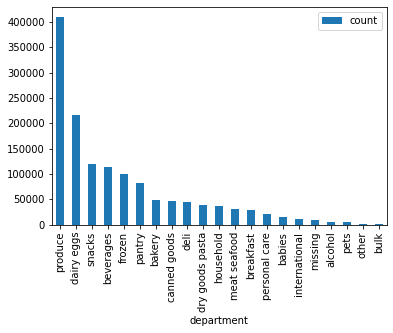

In [ ]:
dept.plot(kind="bar", x="department", y="count")
plt.show()

#### Frequency of each product ordered

In [ ]:
var2 = DataFrame_final.product_id.value_counts()
var2 = pd.DataFrame(var2)
var2.reset_index(inplace=True)
var2.columns = ["product_id", "count"]
prods = var2.merge(datasets['products.csv'], on="product_id")
prods.head(20)

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


<Figure size 3600x2880 with 0 Axes>

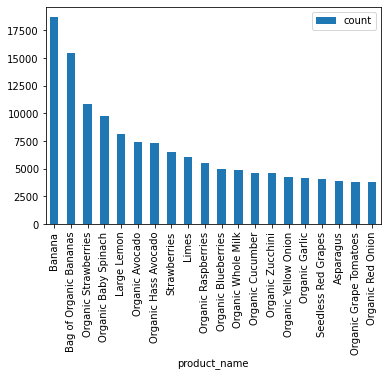

In [ ]:
plt.figure(figsize=(50, 40))
prods.head(20).plot(kind="bar", x="product_name", y="count")
plt.show()

#### Order Frequency as per hour of Day

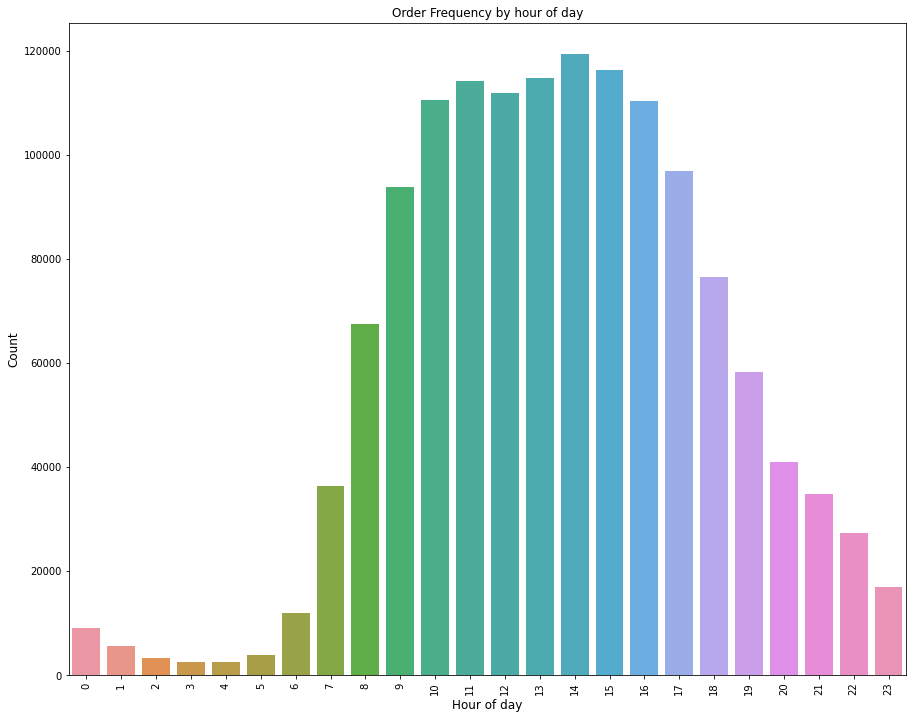

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x="order_hour_of_day", data=DataFrame_final)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order Frequency by hour of day", fontsize=12)
plt.show()

#### Order Frequency on Weekdays

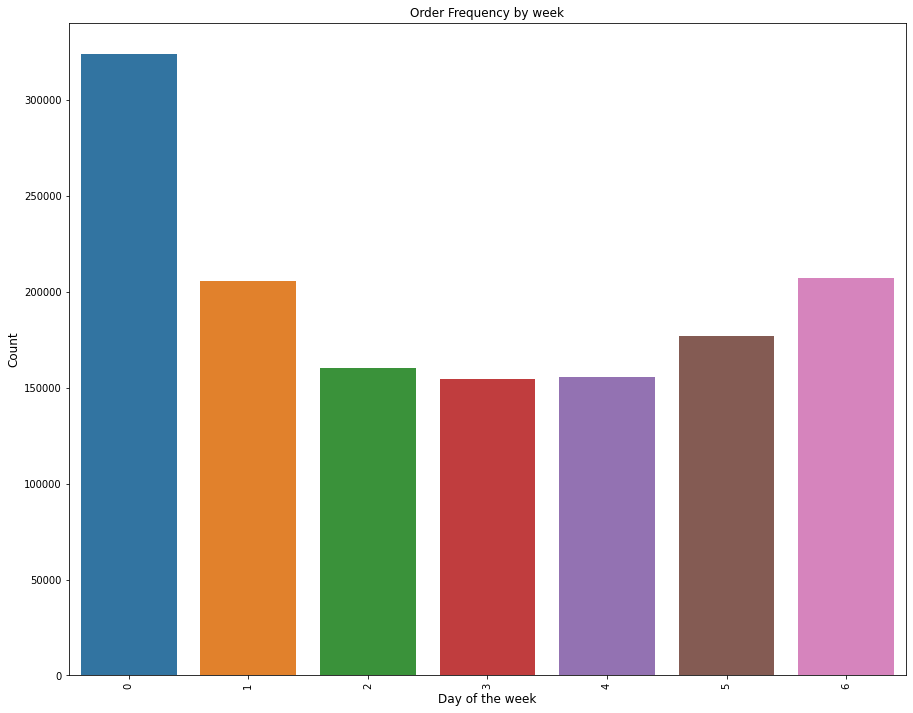

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='order_dow', data=DataFrame_final)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Order Frequency by week", fontsize=12)
plt.show()

## Subsetting the data

#### Since the dataset is too huge we will consider only first 150 frequent order items.

In [ ]:
product_counts = DataFrame_final.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:150].reset_index(drop=True)

In [ ]:
product_counts

,product_id,frequency
0,24852,18726
1,13176,15480
2,21137,10894
3,21903,9784
4,47626,8135
...,...,...
145,23734,1022
146,46676,993
147,16953,991
148,13870,991


In [ ]:
product_freq = list(product_counts.product_id) #frequently bought product ids

In [ ]:
len(product_freq)

150

In [ ]:
#All orders that has Products that are in frequently bought product list
orders_products_final=DataFrame_final[DataFrame_final.product_id.isin(product_freq)]
orders_products_final

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,112108,train,4,4,10,9.0,dairy eggs
5,816049,22035,14,0,Organic Whole String Cheese,21,16,packaged cheese,47901,train,14,4,6,16.0,dairy eggs
9,1383349,24838,2,1,Unsweetened Almondmilk,91,16,soy lactosefree,41425,train,4,3,8,14.0,dairy eggs
12,1787378,33000,2,1,Pure Irish Butter,36,16,butter,187205,train,5,4,14,30.0,dairy eggs
14,2445303,35951,6,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,199120,train,49,3,20,7.0,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351039,425796,41844,1,1,Honey Nut Cheerios,121,14,cereal,64293,train,8,3,15,30.0,breakfast
1351040,983315,41844,1,1,Honey Nut Cheerios,121,14,cereal,180438,train,5,0,12,30.0,breakfast
1351041,2585302,41844,1,0,Honey Nut Cheerios,121,14,cereal,118985,train,8,0,20,6.0,breakfast
1351042,2615771,41844,1,1,Honey Nut Cheerios,121,14,cereal,121185,train,27,6,17,2.0,breakfast


In [ ]:
# Pivot Table to understand the relationship between order_id and product_name where products are reordered
subset_dataset = orders_products_final.pivot_table(columns='product_name', values='reordered', index='order_id')

In [ ]:
subset_dataset

product_name,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Baby Spinach,Bag of Organic Bananas,Banana,Bartlett Pears,...,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Unsweetened Vanilla Almond Milk,Vanilla Almond Breeze Almond Milk,Whipped Cream Cheese,Whole Milk,Yellow Bell Pepper,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Replace NaN by 0
subset_dataset=subset_dataset.reset_index().fillna(0).set_index('order_id')

In [ ]:
subset_dataset

product_name,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Baby Spinach,Bag of Organic Bananas,Banana,Bartlett Pears,...,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Unsweetened Vanilla Almond Milk,Vanilla Almond Breeze Almond Milk,Whipped Cream Cheese,Whole Milk,Yellow Bell Pepper,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Remove floats

def remove_float(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
subset_dataset = subset_dataset.applymap(remove_float)
subset_dataset

product_name,100% Raw Coconut Water,100% Recycled Paper Towels,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Baby Spinach,Bag of Organic Bananas,Banana,Bartlett Pears,...,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Unsweetened Vanilla Almond Milk,Vanilla Almond Breeze Almond Milk,Whipped Cream Cheese,Whole Milk,Yellow Bell Pepper,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_items = fpgrowth(subset_dataset, min_support=5/len(subset_dataset), use_colnames=True)

In [ ]:
frequent_items

,support,itemsets
0,0.015769,(Organic Whole String Cheese)
1,0.024757,(Asparagus)
2,0.018479,(Spring Water)
3,0.016918,(Organic Garnet Sweet Potato (Yam))
4,0.020867,(Organic Baby Arugula)
...,...,...
113285,0.000071,"(Jalapeno Peppers, Sour Cream, Banana)"
113286,0.000071,"(Jalapeno Peppers, Limes, Sour Cream)"
113287,0.000111,"(Sour Cream, Organic Yellow Onion, Banana)"
113288,0.000050,"(Organic Yellow Onion, Organic Avocado, Sour C..."


In [ ]:
subset_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99246 entries, 1 to 3421070
Columns: 150 entries, 100% Raw Coconut Water to Yellow Onions
dtypes: int64(150)
memory usage: 114.3 MB


In [ ]:

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
302899,"(Organic Strawberries, Organic Red Onion, Orga...","(Asparagus, Organic Cucumber, Organic Red Bell...",0.000443,0.000191,0.000050,0.113636,593.576555,5.029499e-05,1.127989
302898,"(Asparagus, Organic Cucumber, Organic Red Bell...","(Organic Strawberries, Organic Red Onion, Orga...",0.000191,0.000443,0.000050,0.263158,593.576555,5.029499e-05,1.356541
290640,"(Organic Garlic, Organic Hass Avocado, Organic...","(Organic Strawberries, Organic Red Onion, Bag ...",0.000665,0.000131,0.000050,0.075758,578.356643,5.029276e-05,1.081825
290621,"(Organic Strawberries, Organic Red Onion, Bag ...","(Organic Garlic, Organic Hass Avocado, Organic...",0.000131,0.000665,0.000050,0.384615,578.356643,5.029276e-05,1.623919
290644,"(Organic Garlic, Organic Red Bell Pepper, Orga...","(Organic Strawberries, Organic Red Onion, Orga...",0.000262,0.000353,0.000050,0.192308,545.307692,5.028748e-05,1.237659
...,...,...,...,...,...,...,...,...,...
690064,"(Pure Sparkling Water, Banana)",(Organic Cucumber),0.001663,0.030298,0.000050,0.030303,1.000151,7.614392e-09,1.000005
1079577,(Bartlett Pears),(Organic Basil),0.008051,0.006257,0.000050,0.006258,1.000103,5.177787e-09,1.000001
1079576,(Organic Basil),(Bartlett Pears),0.006257,0.008051,0.000050,0.008052,1.000103,5.177787e-09,1.000001
207969,(Unsweetened Original Almond Breeze Almond Mil...,(Organic Cilantro),0.003033,0.023255,0.000071,0.023256,1.000020,1.421353e-09,1.000000


In [ ]:
#from mlxtend.frequent_patterns import apriori
#frequent_items = apriori(subset_dataset, min_support=0.02, use_colnames=True)


#from mlxtend.frequent_patterns import association_rules
#rules = association_rules(frequent_items, metric='lift', min_threshold=1)
#rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Hass Avocado),(Bag of Organic Bananas),0.060879,0.134635,0.020283,0.333168,2.474598,0.012086,1.297725
1,(Bag of Organic Bananas),(Organic Hass Avocado),0.134635,0.060879,0.020283,0.150651,2.474598,0.012086,1.105695
2,(Organic Strawberries),(Bag of Organic Bananas),0.086684,0.134635,0.024071,0.277694,2.062566,0.012401,1.198058
3,(Bag of Organic Bananas),(Organic Strawberries),0.134635,0.086684,0.024071,0.178791,2.062566,0.012401,1.112160


# Recommendation

#### Splitting into train, test and prior. use eval_set column. Drop it later

In [ ]:
train=orders[orders['eval_set']=='train'].drop('eval_set',axis=1)
test=orders[orders['eval_set']=='test'].drop('eval_set',axis=1)
prior=orders[orders['eval_set']=='prior'].drop('eval_set',axis=1)


In [ ]:
rules_ante_cons = rules[['antecedents', 'consequents']]

In [ ]:
subset_train=order_products_train[['order_id', 'product_id']]

#### Let's Create Basket for Customer

In [ ]:
baskets = subset_train.groupby('order_id')['product_id'].apply(frozenset)
baskets.name = "basket"

In [ ]:
recommendations = train.join(baskets, on="order_id")
recommendations["recommendations"] = [frozenset() for _ in range(len(recommendations))]

In [ ]:
baskets = DataFrame_final.groupby('order_id')['product_id'].apply(frozenset)
baskets.name = "basket"

We have found some rules. We need to check if the rules that we have found ( especially the antecedants) are there in the customer basket or not. Else there is no point of using these rules

In [ ]:
for idx, antecedent in enumerate(rules_ante_cons["antecedents"]):
    lookup = antecedent <= recommendations.basket, "recommendations"
    recommendations.loc[lookup] = recommendations.loc[lookup].apply(
        frozenset.union,
        args=(rules_ante_cons.loc[idx, "consequents"],)
    )


In [ ]:
recommendations.loc[:, "recommendations"] = recommendations.recommendations - recommendations.basket

# Displaying non empty Recommendations:

In [ ]:
non_empty_recs = recommendations[recommendations.recommendations.apply(bool)]
# mapping codes to product names
def map_products(codes):
    if isinstance(codes, pd.Series):
        return codes.apply(map_products)
    return frozenset(map(products.get, codes))


products = products.set_index("product_id")["product_name"].to_dict() 
#mapping product_id to product_name. Converting to dictionary. product_id being the key and product_name being the value

non_empty_recs.loc[:, ["basket", "recommendations"]] = non_empty_recs[["basket", "recommendations"]].apply(map_products)
display(non_empty_recs)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket,recommendations


In [ ]:
#END

In [ ]:
products.set_index("product_id")["product_name"]

product_id
1                               Chocolate Sandwich Cookies
2                                         All-Seasons Salt
3                     Robust Golden Unsweetened Oolong Tea
4        Smart Ones Classic Favorites Mini Rigatoni Wit...
5                                Green Chile Anytime Sauce
                               ...                        
49684            Vodka, Triple Distilled, Twist of Vanilla
49685                   En Croute Roast Hazelnut Cranberry
49686                                     Artisan Baguette
49687           Smartblend Healthy Metabolism Dry Cat Food
49688                               Fresh Foaming Cleanser
Name: product_name, Length: 49688, dtype: object

In [ ]:
products.set_index("product_id")["product_name"].to_dict() 

{1: 'Chocolate Sandwich Cookies',
 2: 'All-Seasons Salt',
 3: 'Robust Golden Unsweetened Oolong Tea',
 4: 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 5: 'Green Chile Anytime Sauce',
 6: 'Dry Nose Oil',
 7: 'Pure Coconut Water With Orange',
 8: "Cut Russet Potatoes Steam N' Mash",
 9: 'Light Strawberry Blueberry Yogurt',
 10: 'Sparkling Orange Juice & Prickly Pear Beverage',
 11: 'Peach Mango Juice',
 12: 'Chocolate Fudge Layer Cake',
 13: 'Saline Nasal Mist',
 14: 'Fresh Scent Dishwasher Cleaner',
 15: 'Overnight Diapers Size 6',
 16: 'Mint Chocolate Flavored Syrup',
 17: 'Rendered Duck Fat',
 18: 'Pizza for One Suprema  Frozen Pizza',
 19: 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 20: 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 21: 'Small & Medium Dental Dog Treats',
 22: 'Fresh Breath Oral Rinse Mild Mint',
 23: 'Organic Turkey Burgers',
 24: 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 25: 'Salted Caramel Lean Protein & 

In [ ]:
baskets

order_id
1          (11109, 10246, 47209, 43633, 49683, 22035, 493...
36         (34497, 46979, 48679, 19660, 43086, 49235, 396...
38         (42625, 23622, 11913, 28842, 39693, 4461, 1815...
96         (27966, 40706, 24489, 25610, 39275, 30391, 20574)
98         (46720, 24964, 4357, 43654, 18441, 36364, 3406...
                                 ...                        
3421049           (40800, 34243, 17706, 26800, 33424, 17299)
3421056                    (21709, 12432, 5750, 16475, 9340)
3421058    (34466, 6244, 6858, 32650, 30316, 15629, 35578...
3421063                         (14233, 49235, 35548, 13565)
3421070                                 (16953, 4724, 35951)
Name: basket, Length: 131209, dtype: object

In [ ]:
recommendations= DataFrame_final.join(baskets, on="order_id")

In [ ]:
recommendations["recommendations"] = [frozenset() for _ in range(len(recommendations))]

In [ ]:
recommendations

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,basket,recommendations
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,112108,train,4,4,10,9.0,dairy eggs,"(11109, 10246, 47209, 43633, 49683, 22035, 493...",()
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,112108,train,4,4,10,9.0,dairy eggs,"(11109, 10246, 47209, 43633, 49683, 22035, 493...",()
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,112108,train,4,4,10,9.0,dairy eggs,"(11109, 10246, 47209, 43633, 49683, 22035, 493...",()
3,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,47901,train,14,4,6,16.0,dairy eggs,"(38200, 41220, 36772, 1158, 35176, 26604, 4414...",()
4,816049,35176,5,1,Cream Cheese Cream Cheese Spread,108,16,other creams cheeses,47901,train,14,4,6,16.0,dairy eggs,"(38200, 41220, 36772, 1158, 35176, 26604, 4414...",()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,2203844,44218,1,0,Duct Tape,6,2,other,109269,train,11,3,14,30.0,other,"(42611, 44218, 6987, 27117)",()
1384613,2221946,3994,1,0,Max Bed Bug and Flea Killer,6,2,other,24500,train,9,0,9,10.0,other,"(3994, 32939)",()
1384614,2417998,39511,2,0,Baby Diaper Rash Ointment,6,2,other,151951,train,12,0,12,20.0,other,"(9356, 39511)",()
1384615,2462087,19109,1,0,Antifungal Clotrimazole Cream,6,2,other,168591,train,5,1,20,30.0,other,"(19109, 45739, 33452, 45619, 25783)",()


In [ ]:
# computationally-intensive; might require an optimization
for idx, antecedent in enumerate(rules_ante_cons["antecedents"]):
    lookup = antecedent <= recommendations.basket, "recommendations"
    recommendations.loc[lookup] = recommendations.loc[lookup].apply(
        frozenset.union,
        args=(rules_ante_cons.loc[idx, "consequents"],)
    )
# recommendations = recommendations.rename(columns={"antecedents": "basket"})
# this may be changed earlier
recommendations.loc[:, "recommendations"] = recommendations.recommendations - recommendations.basket

In [ ]:
# non-empty recommendations
non_empty_recs = recommendations[recommendations.recommendations.apply(bool)]
#print("1 out of approx.", round(1/(len(non_empty_recs) / len(recommendations))), "transactions will result in a recommendation being suggested to a customer.")
# mapping codes to product names
def map_products(codes):
    if isinstance(codes, pd.Series):
        return codes.apply(map_products)
    return frozenset(map(products.get, codes))

products = datasets[names[4]] #Products
products = products.set_index("product_id")["product_name"].to_dict()
non_empty_recs.loc[:, ["basket", "recommendations"]] = non_empty_recs[["basket", "recommendations"]].apply(map_products)
display(non_empty_recs)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,basket,recommendations


'products.csv'